In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
# Import data
ticker = 'NVCR'
datas = pd.read_csv('../../Datos/lQI/20m/raw_data_run1--27.csv', 
                       index_col ='Date', 
                       parse_dates = True)


#cantidad de training-test
cantidad=len(datas)
print(cantidad)
entrenamiento=int((cantidad/100)*55)
print(entrenamiento)
entrenamiento2=int((cantidad/100)*65)
print(entrenamiento2)
entrenamiento3=int((cantidad/100)*75)
print(entrenamiento3)
testing1=int((cantidad/100)*10)
testing2=int((cantidad/100)*10)
testing3=int((cantidad/100)*25)
data = datas[:entrenamiento] #datos para el entrenamiento, correspondientes al 55%
data

8064
4435
5241
6048


,LQI
Date,
1,1
2,101
3,105
4,1
5,87
...,...
4431,106
4432,107
4433,106


In [3]:
# Estimate historycal log returns
log_returns = np.log(1+data.pct_change())

In [4]:
log_returns.tail()

,LQI
Date,
4431,-0.00939
4432,0.00939
4433,-0.00939
4434,0.00939
4435,0.00000


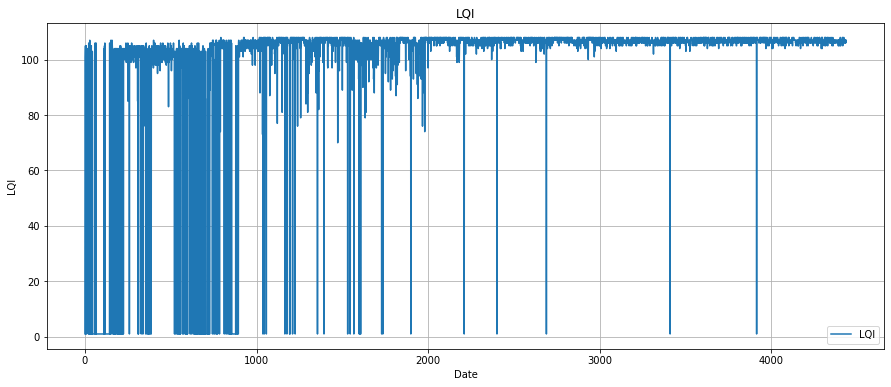

In [5]:
# Plot stock price
data.plot(figsize=(15,6))
plt.ylabel('LQI')
plt.xlabel ('Date')
plt.title('LQI')
plt.grid(True)

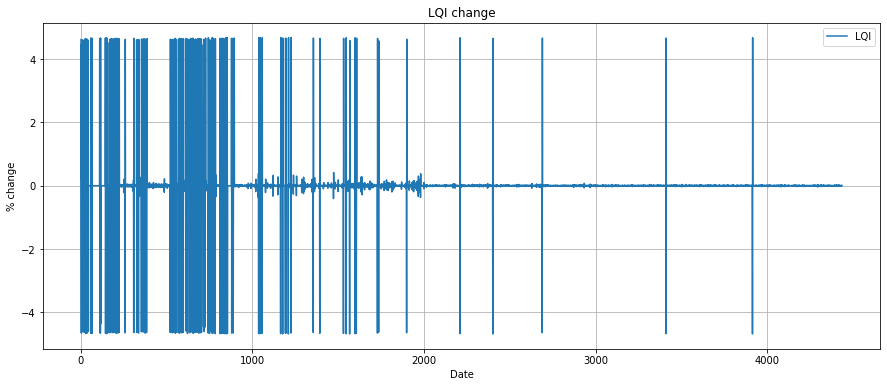

In [6]:
# Plot stock return
log_returns.plot(figsize = (15,6))
plt.ylabel('% change')
plt.xlabel('Date')
plt.title('LQI change')
plt.grid(True)

In [7]:
# Calulate log return mean
u = log_returns.mean()
u

LQI    0.001054
dtype: float64

In [8]:
# Calculate log return variance
var = log_returns.var()
var

LQI    1.228811
dtype: float64

In [9]:
# Calculate drift
# Hence we are predicting daily stock price, this number is NOT annualized. 
drift = u - (0.5*var)
drift

LQI   -0.613352
dtype: float64

In [10]:
# Calculate standard deviation 
stdev = log_returns.std()
stdev

LQI    1.108518
dtype: float64

In [11]:
type(drift)

pandas.core.series.Series

In [12]:
type(stdev)

pandas.core.series.Series

In [13]:
# Convert values to arrays
np.array(drift)

array([-0.6133518])

In [14]:
np.array(stdev)

array([1.10851762])

In [15]:
# Where 0.95 : an event has 95% chance of occuring
norm.ppf(0.95)

1.6448536269514722

In [16]:
# to randomize and generate a 10,2 dimension array. The array below contains randomly generated probilities
x = np.random.rand(10000,2) 
x

array([[0.90286801, 0.20266455],
       [0.07148401, 0.9751914 ],
       [0.35813405, 0.41896741],
       ...,
       [0.08721033, 0.16031705],
       [0.33056906, 0.42568696],
       [0.09742941, 0.53369696]])

In [17]:
# Obtain the distance of these probabilites from the mean
# The first number in the first row correspondes the first number of the first row above
norm.ppf(x)

array([[ 1.29806799, -0.83214145],
       [-1.46482738,  1.96324947],
       [-0.36345088, -0.2045358 ],
       ...,
       [-1.3581356 , -0.99315567],
       [-0.43834235, -0.18736569],
       [-1.29633872,  0.08456643]])

In [18]:
# Generate a random number 'z' that corresposnds to the distance between the mean and the events, 
# expressed as the number of standard deviation
# The new array uses the probailities generated by the random function and 
# converted them into distances from the mean 0, measured by the number of standard deviations. 
# This expression is the 'z' in our formula. 
z = norm.ppf(np.random.rand(10000,2))
z

array([[ 0.40778873, -0.37397133],
       [ 0.26832862, -0.66371266],
       [-0.04533459,  0.37355767],
       ...,
       [ 0.18983326, -0.97005706],
       [-1.10018072,  0.13887911],
       [-0.37401483,  0.07996059]])

In [19]:
# Calucalte stock prices
t_intervals = testing1
iterations = 100000 # We want Python to run the loop ***** times

In [20]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))

In [21]:
daily_returns

array([[0.32039736, 1.27676489, 0.25280616, ..., 1.66121569, 0.39528897,
        0.1674815 ],
       [1.213756  , 0.97408211, 0.7951603 , ..., 0.0852938 , 0.39802605,
        0.03740595],
       [0.58318043, 0.04941394, 0.74186631, ..., 0.08082913, 0.22320469,
        1.84339636],
       ...,
       [0.59608566, 0.4770662 , 0.53369721, ..., 0.872128  , 1.27158535,
        0.50844993],
       [0.86071936, 1.72832681, 0.20758927, ..., 0.09959835, 0.39040328,
        0.90663467],
       [1.38944445, 2.11944216, 0.31136776, ..., 0.48604424, 0.27485063,
        0.28296568]])

In [22]:
# Determining the first datapoint in the equation, which is the latest known price return in our dataset
S0 = data.iloc[-1]
S0

LQI    107
Name: 4435, dtype: int64

In [23]:
# Creating an array, same size as the daily return filed with 0s
price_list = np.zeros_like(daily_returns)

In [24]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
# Replace zeros with the prices by creating a loop
# S0 is the first elemnt on each - here * - columns as we will have * iterations generated from the same
# starting point
price_list[0]=S0
price_list

array([[107., 107., 107., ..., 107., 107., 107.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [26]:
# After generating all the elements of the formula, fill it
for t in range (1, t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [27]:
price_list

array([[1.07000000e+002, 1.07000000e+002, 1.07000000e+002, ...,
        1.07000000e+002, 1.07000000e+002, 1.07000000e+002],
       [1.29871892e+002, 1.04226786e+002, 8.50821525e+001, ...,
        9.12643639e+000, 4.25887872e+001, 4.00243703e+000],
       [7.57387463e+001, 5.15025573e+000, 6.31195823e+001, ...,
        7.37681950e-001, 9.50601693e+000, 7.37807785e+000],
       ...,
       [4.93720015e-223, 1.22247651e-189, 2.79437784e-221, ...,
        6.70089658e-226, 3.89753231e-232, 1.70457366e-213],
       [4.24954374e-223, 2.11283893e-189, 5.80082861e-222, ...,
        6.67398261e-227, 1.52160940e-232, 1.54542558e-213],
       [5.90450498e-223, 4.47803990e-189, 1.80619102e-222, ...,
        3.24385082e-227, 4.18215303e-233, 4.37302402e-214]])

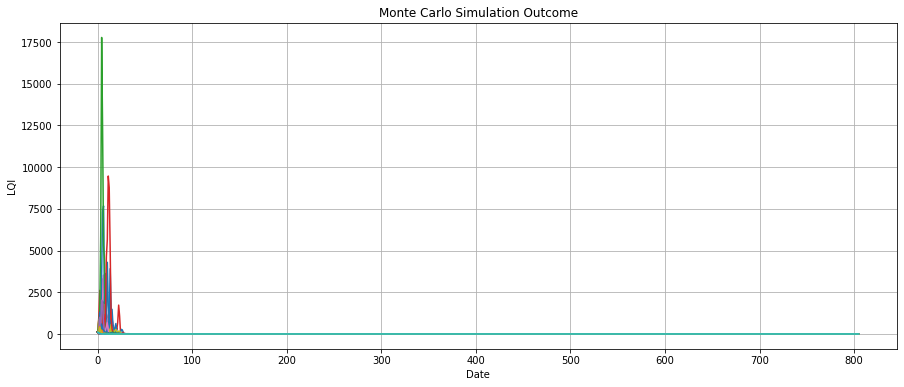

In [28]:
# Plot the last 500 out of the * simulated stock prices
plt.figure(figsize=(15,6))
plt.plot(price_list[:, :500]);
plt.ylabel('LQI')
plt.xlabel('Date')
plt.title ('Monte Carlo Simulation Outcome')
plt.grid(True)

In [29]:
#sacar la parte de test
test = datas[entrenamiento:entrenamiento2]
test=test.reset_index(drop="true")
test

,LQI
0,107
1,107
2,105
3,107
4,106
...,...
801,106
802,107
803,107
804,106


In [30]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

#for para comparar todas las predicciones

menor=15#el rmse mínimo a comenzar a comparar
index=0;

for i in range(0, iterations):
    prediction = rmse(test["LQI"], price_list[:, i]) 
    if prediction<menor:
        menor=prediction
        index=i
        
        
print(menor, index)

15 0


In [31]:
#unir el training de 0-55% con la predicción de 55-65% para volver a entrenar

#convertir a dataframe las predicciones
predictions1=pd.DataFrame(price_list[:,index])
predictions1

,0
0,1.070000e+02
1,1.298719e+02
2,7.573875e+01
3,1.779394e+02
4,8.419621e+01
...,...
801,1.032005e-222
802,8.282702e-223
803,4.937200e-223
804,4.249544e-223


In [32]:
#renombrar la columna para poder concatenar
predictions1=predictions1.rename(columns={0:'LQI'})
predictions1

,LQI
0,1.070000e+02
1,1.298719e+02
2,7.573875e+01
3,1.779394e+02
4,8.419621e+01
...,...
801,1.032005e-222
802,8.282702e-223
803,4.937200e-223
804,4.249544e-223


In [33]:
data = datas[:entrenamiento]
train2 = pd.concat([data,predictions1])
train2=train2.reset_index(drop=True)  #reseteo index
train2

,LQI
0,1.000000e+00
1,1.010000e+02
2,1.050000e+02
3,1.000000e+00
4,8.700000e+01
...,...
5236,1.032005e-222
5237,8.282702e-223
5238,4.937200e-223
5239,4.249544e-223


LQI    1.27369
dtype: float64

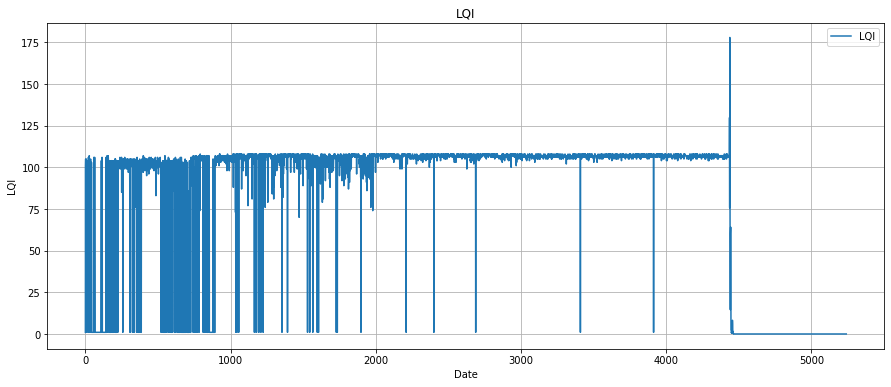

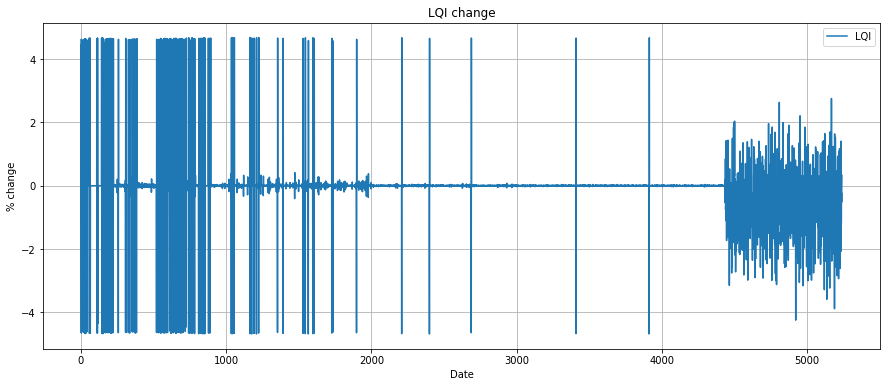

In [34]:
#Realizo el segundo entrenamiento de 0-65 para predecir 65-75
data=train2
# Estimate historycal log returns
log_returns = np.log(1+data.pct_change())
log_returns.tail()
# Plot stock price
data.plot(figsize=(15,6))
plt.ylabel('LQI')
plt.xlabel ('Date')
plt.title('LQI')
plt.grid(True)
# Plot stock return
log_returns.plot(figsize = (15,6))
plt.ylabel('% change')
plt.xlabel('Date')
plt.title('LQI change')
plt.grid(True)
# Calulate log return mean
u = log_returns.mean()
u
# Calculate log return variance
var = log_returns.var()
var

In [35]:
# Calculate drift
# Hence we are predicting daily stock price, this number is NOT annualized. 
drift = u - (0.5*var)
drift
# Calculate standard deviation 
stdev = log_returns.std()
stdev
type(drift)
type(stdev)
# Convert values to arrays
np.array(drift)
np.array(stdev)
# Where 0.95 : an event has 95% chance of occuring
norm.ppf(0.95)
# to randomize and generate a 10,2 dimension array. The array below contains randomly generated probilities
x = np.random.rand(10000,2) 
x

array([[0.45654804, 0.02079083],
       [0.30306433, 0.04202447],
       [0.53019197, 0.66662186],
       ...,
       [0.302591  , 0.1233855 ],
       [0.1002382 , 0.02035843],
       [0.86348221, 0.36203816]])

In [36]:
# Obtain the distance of these probabilites from the mean
# The first number in the first row correspondes the first number of the first row above
norm.ppf(x)
# Generate a random number 'z' that corresposnds to the distance between the mean and the events, 
# expressed as the number of standard deviation
# The new array uses the probailities generated by the random function and 
# converted them into distances from the mean 0, measured by the number of standard deviations. 
# This expression is the 'z' in our formula. 
z = norm.ppf(np.random.rand(10000,2))
z


array([[ 1.10981393, -0.80851914],
       [-0.6145149 , -1.31927107],
       [ 2.13492309,  0.68091941],
       ...,
       [ 0.35500991, -1.40902264],
       [ 1.28401205, -0.27202297],
       [ 0.03068568,  0.07327368]])

In [37]:
# Calucalte stock prices
t_intervals = testing2
iterations = 100000 # We want Python to run the loop ***** times

In [38]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[0.13183488, 2.09958819, 0.04398633, ..., 1.93414104, 0.19274017,
        0.06874265],
       [5.63321011, 0.29760291, 1.55773095, ..., 0.44486391, 0.11997166,
        0.90929768],
       [0.65756811, 0.67109873, 5.84720559, ..., 0.52246489, 0.37173445,
        0.40590107],
       ...,
       [0.98595456, 1.55820878, 1.59643864, ..., 0.99831038, 1.69180259,
        0.29972696],
       [0.30762471, 1.17352107, 0.09566661, ..., 0.05921773, 0.60453922,
        1.16429245],
       [0.36851386, 0.4938602 , 0.55753357, ..., 0.24201568, 0.37491424,
        0.43667473]])

In [39]:
# Determining the first datapoint in the equation, which is the latest known price return in our dataset
S0 = data.iloc[-1]
S0
# Creating an array, same size as the daily return filed with 0s
price_list = np.zeros_like(daily_returns)
price_list
# Replace zeros with the prices by creating a loop
# S0 is the first elemnt on each - here * - columns as we will have * iterations generated from the same
# starting point
price_list[0]=S0
price_list
# After generating all the elements of the formula, fill it
for t in range (1, t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

price_list

array([[5.90450498e-223, 5.90450498e-223, 5.90450498e-223, ...,
        5.90450498e-223, 5.90450498e-223, 5.90450498e-223],
       [3.32613171e-222, 1.75719788e-223, 9.19763013e-223, ...,
        2.62670119e-223, 7.08373250e-224, 5.36895270e-223],
       [2.18715814e-222, 1.17925327e-223, 5.37804343e-222, ...,
        1.37235914e-223, 2.63326740e-224, 2.17926367e-223],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

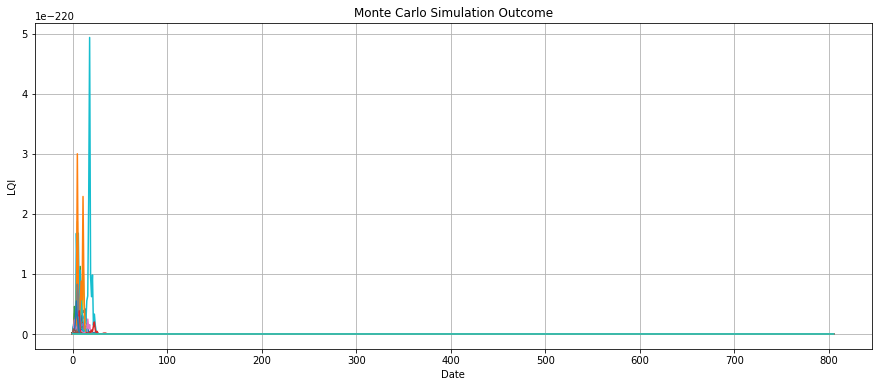

In [40]:
# Plot the last 500 out of the * simulated stock prices
plt.figure(figsize=(15,6))
plt.plot(price_list[:, :5000]);
plt.ylabel('LQI')
plt.xlabel('Date')
plt.title ('Monte Carlo Simulation Outcome')
plt.grid(True)

In [41]:
#sacar la parte de test
test = datas[entrenamiento2:entrenamiento3-1]
test=test.reset_index(drop="true")
test

,LQI
0,107
1,107
2,107
3,108
4,107
...,...
801,107
802,106
803,106
804,107


In [42]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

#for para comparar todas las predicciones

menor=14#el rmse mínimo a comenzar a comparar
index=0;

for i in range(0, iterations):
    prediction = rmse(test["LQI"], price_list[:, i]) 
    if prediction<menor:
        menor=prediction
        index=i
        
        
print(menor, index)

14 0


In [43]:
#unir el training de 0-65% con la predicción de 65-75% para volver a entrenar

#convertir a dataframe las predicciones
predictions2=pd.DataFrame(price_list[:,index])
predictions2

,0
0,5.904505e-223
1,3.326132e-222
2,2.187158e-222
3,6.121929e-222
4,6.996989e-222
...,...
801,0.000000e+00
802,0.000000e+00
803,0.000000e+00
804,0.000000e+00


In [44]:
#renombrar la columna para poder concatenar
predictions2=predictions2.rename(columns={0:'LQI'})
predictions2

,LQI
0,5.904505e-223
1,3.326132e-222
2,2.187158e-222
3,6.121929e-222
4,6.996989e-222
...,...
801,0.000000e+00
802,0.000000e+00
803,0.000000e+00
804,0.000000e+00


In [45]:
data = datas[:entrenamiento]
train3 = pd.concat([train2,predictions2])
train3=train2.reset_index(drop=True)  #reseteo index
train3

,LQI
0,1.000000e+00
1,1.010000e+02
2,1.050000e+02
3,1.000000e+00
4,8.700000e+01
...,...
5236,1.032005e-222
5237,8.282702e-223
5238,4.937200e-223
5239,4.249544e-223


LQI    1.27369
dtype: float64

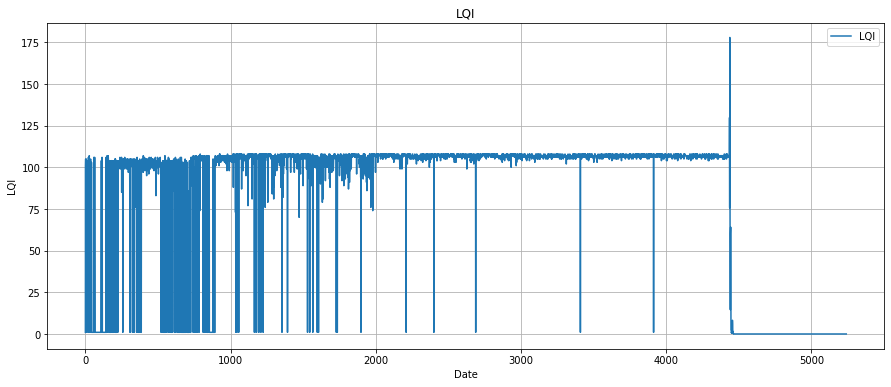

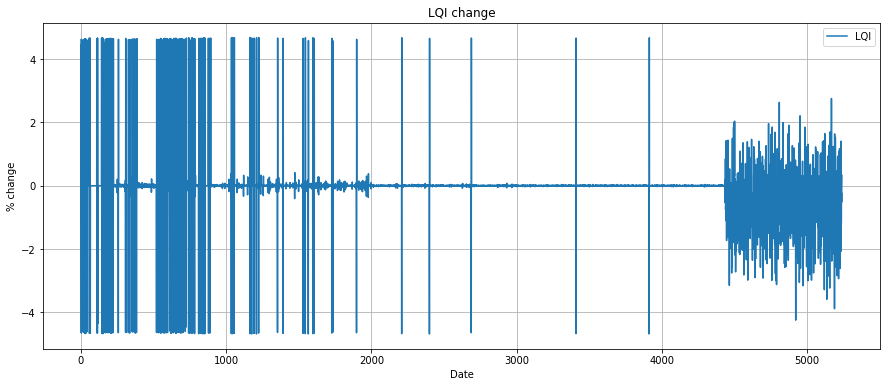

In [46]:
#Realizo el tercer entrenamiento de 0-75 para predecir 75-100
data=train3
# Estimate historycal log returns
log_returns = np.log(1+data.pct_change())
log_returns.tail()
# Plot stock price
data.plot(figsize=(15,6))
plt.ylabel('LQI')
plt.xlabel ('Date')
plt.title('LQI')
plt.grid(True)
# Plot stock return
log_returns.plot(figsize = (15,6))
plt.ylabel('% change')
plt.xlabel('Date')
plt.title('LQI change')
plt.grid(True)
# Calulate log return mean
u = log_returns.mean()
u
# Calculate log return variance
var = log_returns.var()
var

In [47]:
# Calculate drift
# Hence we are predicting daily stock price, this number is NOT annualized. 
drift = u - (0.5*var)
drift
# Calculate standard deviation 
stdev = log_returns.std()
stdev
type(drift)
type(stdev)
# Convert values to arrays
np.array(drift)
np.array(stdev)
# Where 0.95 : an event has 95% chance of occuring
norm.ppf(0.95)
# to randomize and generate a 10,2 dimension array. The array below contains randomly generated probilities
x = np.random.rand(10000,2) 
x

array([[0.86536763, 0.16591038],
       [0.21862798, 0.17927173],
       [0.67261268, 0.61207716],
       ...,
       [0.7717008 , 0.1456882 ],
       [0.62350065, 0.74063167],
       [0.43640268, 0.92920224]])

In [48]:
# Obtain the distance of these probabilites from the mean
# The first number in the first row correspondes the first number of the first row above
norm.ppf(x)
# Generate a random number 'z' that corresposnds to the distance between the mean and the events, 
# expressed as the number of standard deviation
# The new array uses the probailities generated by the random function and 
# converted them into distances from the mean 0, measured by the number of standard deviations. 
# This expression is the 'z' in our formula. 
z = norm.ppf(np.random.rand(10000,2))
z


array([[ 0.5598499 ,  1.55023016],
       [ 0.65442294,  1.08266693],
       [-1.16295461,  2.43816907],
       ...,
       [-0.54323368,  1.10206394],
       [ 1.07307696, -0.43436792],
       [-0.11446958, -0.52502409]])

In [49]:
# Calucalte stock prices
t_intervals = testing3
iterations = 100000 # We want Python to run the loop ***** times

In [50]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[0.2782195 , 1.16409251, 0.04522788, ..., 0.28736534, 0.6195973 ,
        1.02683588],
       [0.57188692, 1.47898264, 0.38784116, ..., 1.68897678, 0.08346936,
        0.15853875],
       [2.05112514, 0.60478508, 1.78055584, ..., 0.5905919 , 1.37761184,
        0.17388707],
       ...,
       [0.16812763, 0.26005319, 0.40319506, ..., 0.30993482, 0.7300784 ,
        0.07952876],
       [0.31321627, 0.2887899 , 1.02223602, ..., 0.46095167, 0.07685789,
        2.26796639],
       [0.07563459, 1.31704396, 0.53534531, ..., 1.82749695, 0.03523149,
        0.96436181]])

In [51]:
# Determining the first datapoint in the equation, which is the latest known price return in our dataset
S0 = data.iloc[-1]
S0
# Creating an array, same size as the daily return filed with 0s
price_list = np.zeros_like(daily_returns)
price_list
# Replace zeros with the prices by creating a loop
# S0 is the first elemnt on each - here * - columns as we will have * iterations generated from the same
# starting point
price_list[0]=S0
price_list
# After generating all the elements of the formula, fill it
for t in range (1, t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

price_list

array([[5.90450498e-223, 5.90450498e-223, 5.90450498e-223, ...,
        5.90450498e-223, 5.90450498e-223, 5.90450498e-223],
       [3.37670918e-223, 8.73266038e-223, 2.29001006e-223, ...,
        9.97257179e-223, 4.92845229e-224, 9.36092845e-224],
       [6.92605308e-223, 5.28138267e-223, 4.07749078e-223, ...,
        5.88972011e-223, 6.78949420e-224, 1.62774445e-224],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

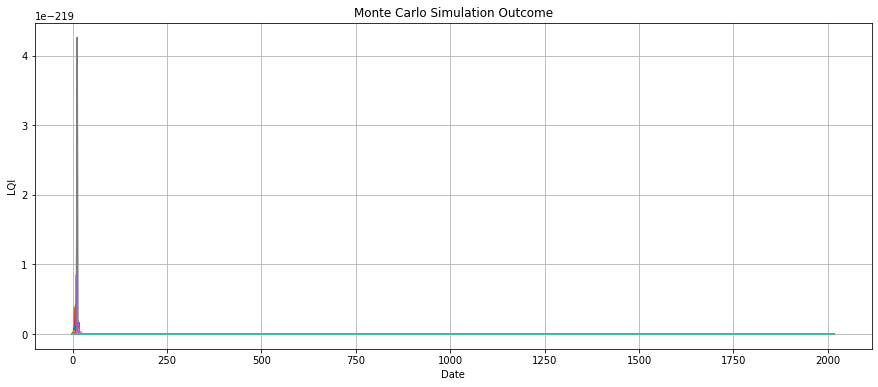

In [52]:
# Plot the last 500 out of the * simulated stock prices
plt.figure(figsize=(15,6))
plt.plot(price_list[:, :5000]);
plt.ylabel('LQI')
plt.xlabel('Date')
plt.title ('Monte Carlo Simulation Outcome')
plt.grid(True)

In [53]:
#sacar la parte de test
test = datas[entrenamiento3:cantidad]
test=test.reset_index(drop="true")
test

,LQI
0,107
1,106
2,107
3,108
4,108
...,...
2011,103
2012,104
2013,101
2014,102


In [ ]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

#for para comparar todas las predicciones

menor=1500#el rmse mínimo a comenzar a comparar
index=0;

for i in range(0, iterations):
    prediction = rmse(test["LQI"], price_list[:, i]) 
    if prediction<menor:
        menor=prediction
        index=i
        
        
print(menor, index)

In [ ]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

#Hallar las diferentes métricas

prediction1 = price_list[:, index];
rmse(test["LQI"], prediction1) 


# Calculate mean squared error 
mse = mean_squared_error(test["LQI"], prediction1)
print("MSE: ")
print(mse)

# Calculate root mean squared error 
rmse = rmse(test["LQI"], prediction1)
print("\nRMSE: ")
print(rmse)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape =  mean_absolute_percentage_error(test["LQI"], prediction1)
print("\nMAPE (Porcentaje): ")
print(mape)

In [ ]:
bp = price_list[:,index];

test.plot(figsize = (20, 5), label="true");
plt.plot(bp, label="forecast");